# Example of Python numpy Fourier transform


The following is an example of using the Python numpy library to execute a Fourier transform with numpy.fft.  

In the first part, the code creates a sample waveform as the sum of several sine waves in the time domain.  

In the second part, the sample waveform is put through the Fourier transform and the output frequency domain plot is created.  


### Import Libraries

In [1]:
# Import libraries to use  
import numpy as np
import matplotlib.pyplot as plt

## Part 1:  Create a signal waveform


### Setup time values for wave samples

In [2]:
# Create array of times for samples (x axis points) 
sample_rate = 100
sample_interval = 1 / sample_rate
sample_start_time = 0;
sample_end_time = 10; 

# populate sample times array 
sample_times = np.arange(sample_start_time, sample_end_time, sample_interval);

### Create arrays with amplitude values 

In [3]:
# Create arrays to represent wave heights (y values) for several sine waves 

# wave frequencies 
wave_freqs = [2, 3, 7, 15]

# Create array of wave applitute arrays for t in the sample_times array 
waves = np.ndarray(shape=(len(wave_freqs),len(sample_times)))

# Use the values in the frequencies array to create wave arrays 
for i in range(len(wave_freqs)):
    waves[i] = np.sin(2 * np.pi * wave_freqs[i] * sample_times)

### Plot each of the waveforms created above

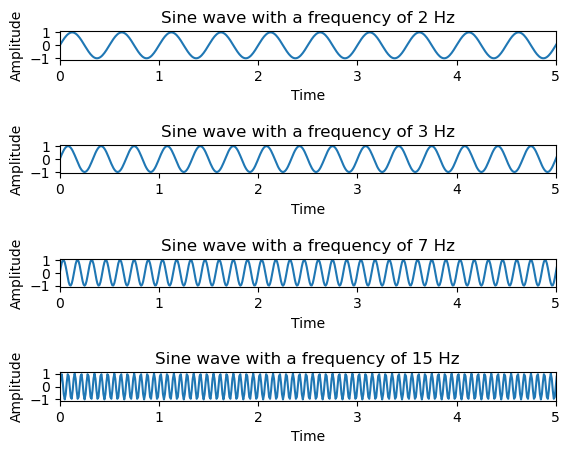

In [4]:
# Plot the basic waveforms created above 

# Create subplot for the waves 
figure, axis = plt.subplots(len(waves), 1)
plt.subplots_adjust(hspace=3) # this helped where there are 4 waves to plot 

# Loop through the waves and plot each one 
for i in range(len(waves)):
    axis[i].set_title('Sine wave with a frequency of ' + str(wave_freqs[i]) + ' Hz')
    axis[i].plot(sample_times, waves[i])
    axis[i].set_xlabel('Time')
    axis[i].set_ylabel('Amplitude')
    axis[i].set_xlim([0, 5])

### Create a signal wave as the sum of the waves above

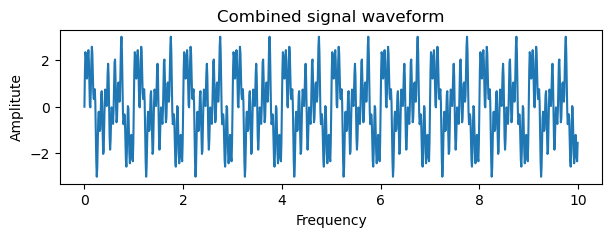

In [5]:
# Create a signal wave as a sum of the basic wave amplitudes and plot 
#  (remember they all share the sample_times for x axis time values)

# Initialize a signal wave array 
signal_wave = np.zeros(len(sample_times))

# Add each wave to the signal wave
for i in range(len(waves)):
    signal_wave += waves[i]

# Plot the combined signal wave 
plt.figure(figsize=(7, 2))
plt.subplot()
plt.plot(sample_times, signal_wave)
plt.title('Combined signal waveform')
plt.xlabel('Frequency')
plt.ylabel('Amplitute')
plt.show()

## Part 2:  Apply Fourier transform to the signal waveform

In [6]:
# Now let's run the signal wave through the Fourier transform 

# Frequency domain representation of signal wave 
fourierTransform = np.fft.fft(signal_wave)
fourierTransform = fourierTransform / len(signal_wave)           # Normalize 
fourierTransform = fourierTransform[range(int(len(signal_wave)/2))] # keep first half of array for plotting 

### Setup frequencies for plotting

In [7]:
# Create x axis array of frequency values for plot 
num_samples = len(signal_wave)
time_period  = num_samples/sample_rate
values      = np.arange(int(num_samples/2))
frequencies = values/time_period

### Plot frequency components 

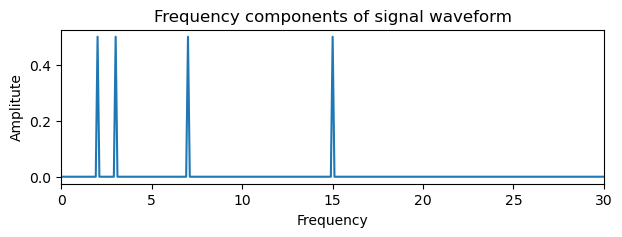

In [8]:
# Plot the frequency domain representation of the signal wave 

plt.figure(figsize=(7, 2))
plt.subplot()
plt.plot(frequencies, abs(fourierTransform))  # plot absolute value for amplitude 

plt.xlim(0,2*max(wave_freqs))
plt.title('Frequency components of signal waveform')
plt.xlabel('Frequency')
plt.ylabel('Amplitute')
plt.show()